# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
import string, re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Building Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, LSTM, Bidirectional

# Download Model
import pickle

# Reading Data

In [2]:
data = pd.read_csv(r"D:\Courses language programming\11_Natural Language Processing\Projects For NLP\Data\fake-news\train.csv")
test = pd.read_csv(r"D:\Courses language programming\11_Natural Language Processing\Projects For NLP\Data\fake-news\test.csv")

In [3]:
data.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [4]:
test.head(3)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...


In [5]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [7]:
data.shape, test.shape

((20800, 5), (5200, 4))

# Preprocessing Data & Analysis

## Drop Some Columns -- (ID, Author)

In [8]:
def drop_col(data):
    for col in ["id", "author"]: data.drop(col, axis=1, inplace=True)
        
    return data

data = drop_col(data)
test = drop_col(test)

In [9]:
data.head(2)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0


In [10]:
test.head(2)

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...


In [11]:
data["title"].value_counts()

Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence              5
The Dark Agenda Behind Globalism And Open Borders                                                               5
Schools All Over America Are Closing On Election Day Due To Fears Of Violence                                   4
“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                        4
Public vs. Media on War                                                                                         4
                                                                                                               ..
Report: Only 6% of Millennials Said Their Social Media Was a ’Completely True’ Depiction of Them - Breitbart    1
Hillary Clinton, Donald Trump, Iraq Inquiry: Your Wednesday Evening Briefing - The New York Times               1
Shall We Save Civilization, or Not? - American Herald Tribune                           

In [12]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [13]:
test.isnull().sum()

title    122
text       7
dtype: int64

In [14]:
test[test["text"].isnull()]

,title,text
589,[Vidéo] Que trouve-t-on dans « Le Gorafi de l’...,NaN
626,Nous avons comparé les programmes d’Alain Jupp...,NaN
978,« J’y crois encore ! » par Alain Juppé en trai...,NaN
2257,Horoscope du 14 novembre 2016 >> Le Gorafi,NaN
2892,Une fan demande le remboursement de son tatoua...,NaN
4736,Révélations – François Fillon serait de droite...,NaN
5092,Des traces de vin rouge détectées dans le Beau...,NaN


In [15]:
data[data["text"].isnull()]

,title,text,label
142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,1
573,Le top des recherches Google passe en top des ...,NaN,1
1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,1
1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,1
2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,1
2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,1
2793,«Pourquoi je suis candidat à la présidentielle...,NaN,1
3329,GuinessBook : 100 millions d’Américains batten...,NaN,1
3729,Les Américains ne sont plus qu’à quelques heur...,NaN,1
4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,1


##  Filling Some Data -- (TEXT, TITLE)

In [16]:
def fill_data(data):
    data["title"] = data["title"].fillna("No Title")
    data["text"] = data["text"].fillna("No text")
    return data

data = fill_data(data)
test = fill_data(test)

In [17]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [18]:
test.isnull().sum()

title    0
text     0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20800 non-null  object
 1   text    20800 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 487.6+ KB


In [20]:
data.head(2)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0


In [21]:
test.head(2)

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...


In [22]:
data["new_text"] = data["title"] + " " + data["text"]
test["new_text"] = test["title"] + " " + test["text"]

In [23]:
data.head(2)

,title,text,label,new_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."


In [24]:
test.head(2)

,title,text,new_text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...


# Make Processing In Text

### Transform Upper Case To lower Case & Remove All Punctiuation & Remove Stop Words

In [25]:
punc = list(string.punctuation)
stop_words = stopwords.words("english")

def processing_text(data):
    data.lower()
    
    data = " ".join([word for word in word_tokenize(data) if ((word not in stop_words) and (word not in punc))])
    
    data = re.sub("[^a-z]", " ", data)
    
    return data

In [26]:
data["Final_text"] = data["new_text"].apply(processing_text)
test["Final_text"] = test["new_text"].apply(processing_text)

In [27]:
data.head(5)

,title,text,label,new_text,Final_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,ouse em ide e idn ven ee omey ett...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",illary linton ig oman ampus reitba...
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,hy ruth ight et ou ired hy ruth ight ...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,ivilians illed n ingle irstrike av...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,ranian woman jailed fictional unpublished sto...


In [28]:
test.head(5)

,title,text,new_text,Final_text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse...",pecter rump oosens ongues ot urse tring...
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,ussian warships ready strike terrorists near ...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...,o ative merican eaders ow tay ll i...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ...",im ebow ill ttempt nother omeback his ...
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...,eiser eport eme ars mins ago ie...


# Drop Columns ==> new_text, title, text

In [29]:
def drop_extra_col(data):
    for col in ["title", "text", "new_text"]: data.drop(col, axis=1, inplace=True)
        
    return data

data = drop_extra_col(data)
test = drop_extra_col(test)

In [30]:
data.head(5)

,label,Final_text
0,1,ouse em ide e idn ven ee omey ett...
1,0,illary linton ig oman ampus reitba...
2,1,hy ruth ight et ou ired hy ruth ight ...
3,1,ivilians illed n ingle irstrike av...
4,1,ranian woman jailed fictional unpublished sto...


In [31]:
test.head(5)

,Final_text
0,pecter rump oosens ongues ot urse tring...
1,ussian warships ready strike terrorists near ...
2,o ative merican eaders ow tay ll i...
3,im ebow ill ttempt nother omeback his ...
4,eiser eport eme ars mins ago ie...


# Splitting Data

In [32]:
X = data["Final_text"]
Y = data["label"]

In [33]:
label = to_categorical(Y, 2)

In [34]:
label

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Make Tokenization

In [35]:
Max_vocab_size = 20000
max_sequance_lenght = 100
Embeding_dim = 100

In [36]:
tokenize = Tokenizer(oov_token="<OOV>")
tokenize.fit_on_texts(X)
word_idx = tokenize.word_index

text2seq = tokenize.texts_to_sequences(X)

# pad_seq = pad_sequences(text2seq, maxlen=150, padding="pre", truncating="pre")

pad_seq = pad_sequences(text2seq, padding="pre", truncating="pre")


print("The Padding Sequance Shape is  --> ", pad_seq.shape)

The Padding Sequance Shape is  -->  (20800, 12815)


In [37]:
input_length = max(len(seq) for seq in text2seq)

vocabulary_size = len(word_idx) + 1

In [38]:
input_length, vocabulary_size

(12815, 151340)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(pad_seq, label, train_size=0.7, random_state=42)

# Building Model

In [41]:
model = tf.keras.models.Sequential(
    [
        Embedding(vocabulary_size, 150, input_length=input_length),
        GlobalAveragePooling1D(),
        Dense(128, activation="relu"),
        Dense(24, activation="relu"),
        Dense(2, activation="softmax")
    ])

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12815, 150)        22701000  
                                                                 
 global_average_pooling1d (G  (None, 150)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               19328     
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 22,723,474
Trainable params: 22,723,474
Non-trainable params: 0
____________________________________________

In [42]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
455/455 - 16s - loss: 0.6861 - accuracy: 0.5333 - val_loss: 0.6343 - val_accuracy: 0.6187 - 16s/epoch - 35ms/step
Epoch 2/10
455/455 - 14s - loss: 0.3578 - accuracy: 0.8447 - val_loss: 0.2379 - val_accuracy: 0.8829 - 14s/epoch - 31ms/step
Epoch 3/10
455/455 - 14s - loss: 0.1682 - accuracy: 0.9372 - val_loss: 0.1792 - val_accuracy: 0.9460 - 14s/epoch - 31ms/step
Epoch 4/10
455/455 - 14s - loss: 0.0968 - accuracy: 0.9675 - val_loss: 0.1213 - val_accuracy: 0.9567 - 14s/epoch - 31ms/step
Epoch 5/10
455/455 - 14s - loss: 0.0641 - accuracy: 0.9780 - val_loss: 0.1105 - val_accuracy: 0.9630 - 14s/epoch - 31ms/step
Epoch 6/10
455/455 - 14s - loss: 0.0570 - accuracy: 0.9795 - val_loss: 0.1120 - val_accuracy: 0.9617 - 14s/epoch - 31ms/step
Epoch 7/10
455/455 - 14s - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.3138 - val_accuracy: 0.8776 - 14s/epoch - 31ms/step
Epoch 8/10
455/455 - 14s - loss: 0.0372 - accuracy: 0.9863 - val_loss: 0.1179 - val_accuracy: 0.9636 - 14s/epoch - 31ms/step


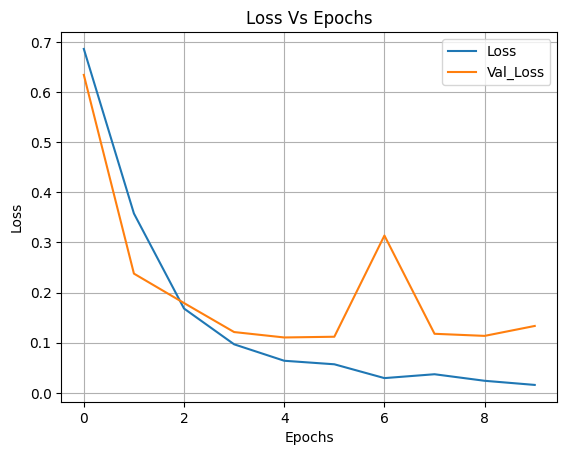

In [43]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

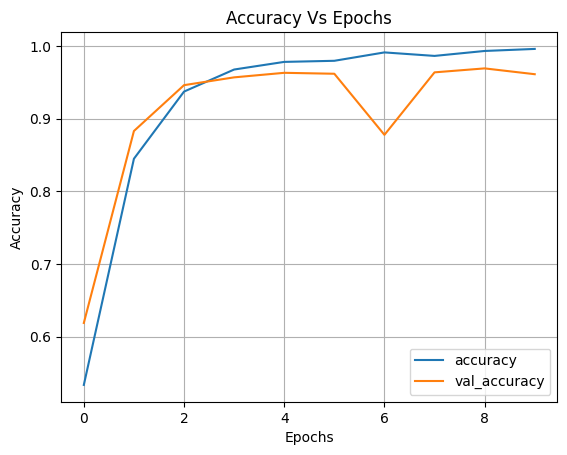

In [44]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Make Submition

In [45]:
submit = pd.read_csv(r"D:\Courses language programming\11_Natural Language Processing\Projects For NLP\Data\fake-news\submit.csv")
submit.head(5)

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [46]:
test.head(4)

,Final_text
0,pecter rump oosens ongues ot urse tring...
1,ussian warships ready strike terrorists near ...
2,o ative merican eaders ow tay ll i...
3,im ebow ill ttempt nother omeback his ...


In [49]:
tokenize.fit_on_texts(test["Final_text"])
word_idx = tokenize.word_index

text2seq = tokenize.texts_to_sequences(test["Final_text"])

# pad_seq = pad_sequences(text2seq, maxlen=150, padding="pre", truncating="pre")

pad_seq_test = pad_sequences(text2seq, padding="pre", truncating="pre", maxlen=12815)


print("The Padding Sequance Shape is  --> ", pad_seq_test.shape)

The Padding Sequance Shape is  -->  (5200, 12815)


In [50]:
prediction = model.predict(pad_seq_test)

163/163 [==============================] - 1s 6ms/step


In [52]:
prediction = [i.argmax() for i in prediction]
prediction

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,


In [53]:
submit["label"] = prediction

In [55]:
submit.head(5)

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [56]:
submit.to_csv(r"D:\Courses language programming\11_Natural Language Processing\Projects For NLP\Data\fake-news\submition.csv", index=False)

# System Prediction

In [49]:
text = word_tokenize(input())

new_text = ""
for word in text:
    if (word not in stop_words) and (word not in punc):
        new_text += word
        new_text += " "
        
print(new_text)
test_sequace = tokenize.texts_to_sequences([new_text])
test_padding = pad_sequences(test_sequace, maxlen=12815,padding="pre", truncating="pre")


# test_sequace
prediction = model.predict(test_padding)

print(prediction[0])
if np.argmax(prediction) == 1: print("This Massage is -->  SPAM ")
else: print("This Massage is -->  HAM ")

SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
SIX chances win CASH From 100 20,000 pounds txt CSH11 send 87575 Cost 150p/day 6days 16+ TsandCs apply Reply HL 4 info 
1/1 [==============================] - 0s 15ms/step
[0.00491421 0.9950858 ]
This Massage is -->  SPAM 


# Downloading Model In Device

In [50]:
pickle.dump(model, open(r"D:\Pycharm\model_pickle\NLP - Models\Fake-News.bin", "wb"))

INFO:tensorflow:Assets written to: ram://93c5a351-526c-4916-bf2c-e522e9674765/assets
